In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import klib

In [2]:
df=pd.read_csv("fraud.csv")

df=pd.DataFrame(df)

In [3]:
df.head()


step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [4]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

## Data cleaning

In [5]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
for i in range(df.shape[1]):
    # count number of rows with missing values
    n_miss = df.iloc[:,i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)


In [8]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [9]:
df.duplicated().sum()

0

no missing and dublicate values

In [10]:
df["amount"].unique()

array([9.83964000e+03, 1.86428000e+03, 1.81000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])

In [11]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
type=df["type"].value_counts()

In [13]:
type


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
px.pie(df,values=type.values,names=type.index,hole=0.4,title="Transactions Type")

In [15]:
skew=df.skew().sort_values(ascending= False)
skew_df=pd.DataFrame({"skew":skew})
skew_df.head(8)

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\1882450137.py:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



skew
isFlaggedFraud  630.603629
amount           30.993949
isFraud          27.779538
oldbalanceDest   19.921758
newbalanceDest   19.352302
oldbalanceOrg     5.249136
newbalanceOrig    5.176884
step              0.375177

In [16]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

Index(['isFlaggedFraud', 'amount', 'isFraud', 'oldbalanceDest',
       'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig'],
      dtype='object')

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\3289819549.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




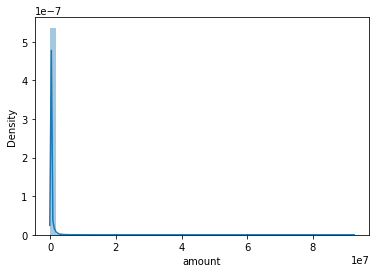

In [17]:
fig = sns.distplot(df['amount'])

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\4126833998.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




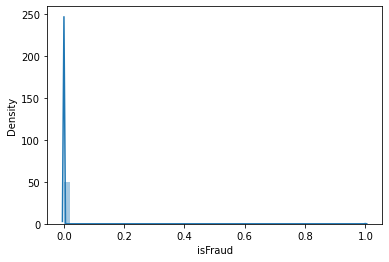

In [18]:
fig = sns.distplot(df['isFraud'])

 Data is  highly skewed

In [19]:
correcting_data= np.log(df['amount' ]+1,df['isFraud' ]+1)

print(df['amount'].skew())

print(correcting_data.skew())

30.99394948249038
-0.5550183204227738


In [20]:
#fig = sns.distplot(correcting_data)

In [21]:
df["isFraud"]=df["isFraud"].map({0:"No Fraud",1:"Fraud"})

In [22]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
0             160296.36  M1979787155            0.00            0.00   
1              19384.72  M2044282225            0.00            0.00   
2                  0.00   C553264065            0.00            0.00   
3                  0.00    C38997010        21182.00            0.00   
4              29885.86  M1230701703            0.00            0.00   
...                 ...          ...             ...             ...   
6362615            0.00   C776919290            0.00       339682.13   
6362616            0.00  C1881841831            0.00            0.00   
6362617            0.00  C1365125890        68488.84      6379898.11   
6362618            0.00  C2080388513            0.00            0.00   
6362619            0.00   C873221189      6510099.11      7360101.63   

          isFraud  isFlaggedFraud  
0        No Fraud               0  
1        No Fraud               0  
2           Fraud               0  
3           Fraud               0  
4        No Fraud               0  
...           ...             ...  
6362615     Fraud               0  
6362616     Fraud               0  
6362617     Fraud               0  
6362618     Fraud               0  
6362619     Fraud               0  

[6362620 rows x 11 columns]

In [23]:
kurtosis= pd.DataFrame(df.kurtosis(),columns=['Kurtosis'])
kurtosis.head(8)

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2566292010.py:1: FutureWarning:

The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Kurtosis
step                 0.329071
amount            1797.956705
oldbalanceOrg       32.964879
newbalanceOrig      32.066985
oldbalanceDest     948.674125
newbalanceDest     862.156508
isFlaggedFraud  397659.062500

In [24]:
correcting_data.kurtosis()

0.18355647921117813

In [25]:
kurtosis[(kurtosis['Kurtosis']>=3) |(kurtosis['Kurtosis']<=-3) ].index

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')

In [26]:
var= df.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
var_df.head(10)

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2530642332.py:1: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



var
isFlaggedFraud  2.514681e-06
step            2.025839e+04
amount          3.646448e+11
oldbalanceOrg   8.341946e+12
newbalanceOrig  8.550060e+12
oldbalanceDest  1.155443e+13
newbalanceDest  1.349922e+13

In [27]:
IQR=df.quantile(0.75)-df.quantile(0.25)

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\1379694928.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [28]:
print(IQR)

step              1.790000e+02
amount            1.953319e+05
oldbalanceOrg     1.073152e+05
newbalanceOrig    1.442584e+05
oldbalanceDest    9.430367e+05
newbalanceDest    1.111909e+06
isFlaggedFraud    0.000000e+00
dtype: float64


In [29]:
num=df.select_dtypes(exclude=['category']) 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = num[~((num < (Q1 - 1.5 * IQR))|(num > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
del num 
del df_out 

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2215040196.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2215040196.py:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2215040196.py:4: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(4321893, 11)


In [30]:
df.shape

(6362620, 11)

In [31]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  isFlaggedFraud  
count    6.362620e+06    6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06    2.514687e-06  
std      3.399180e+06    3.674129e+06    1.585775e-03  
min      0.000000e+00    0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05    0.000000e+00  
75%      9.430367e+05    1.111909e+06    0.000000e+00  
max      3.560159e+08    3.561793e+08    1.000000e+00

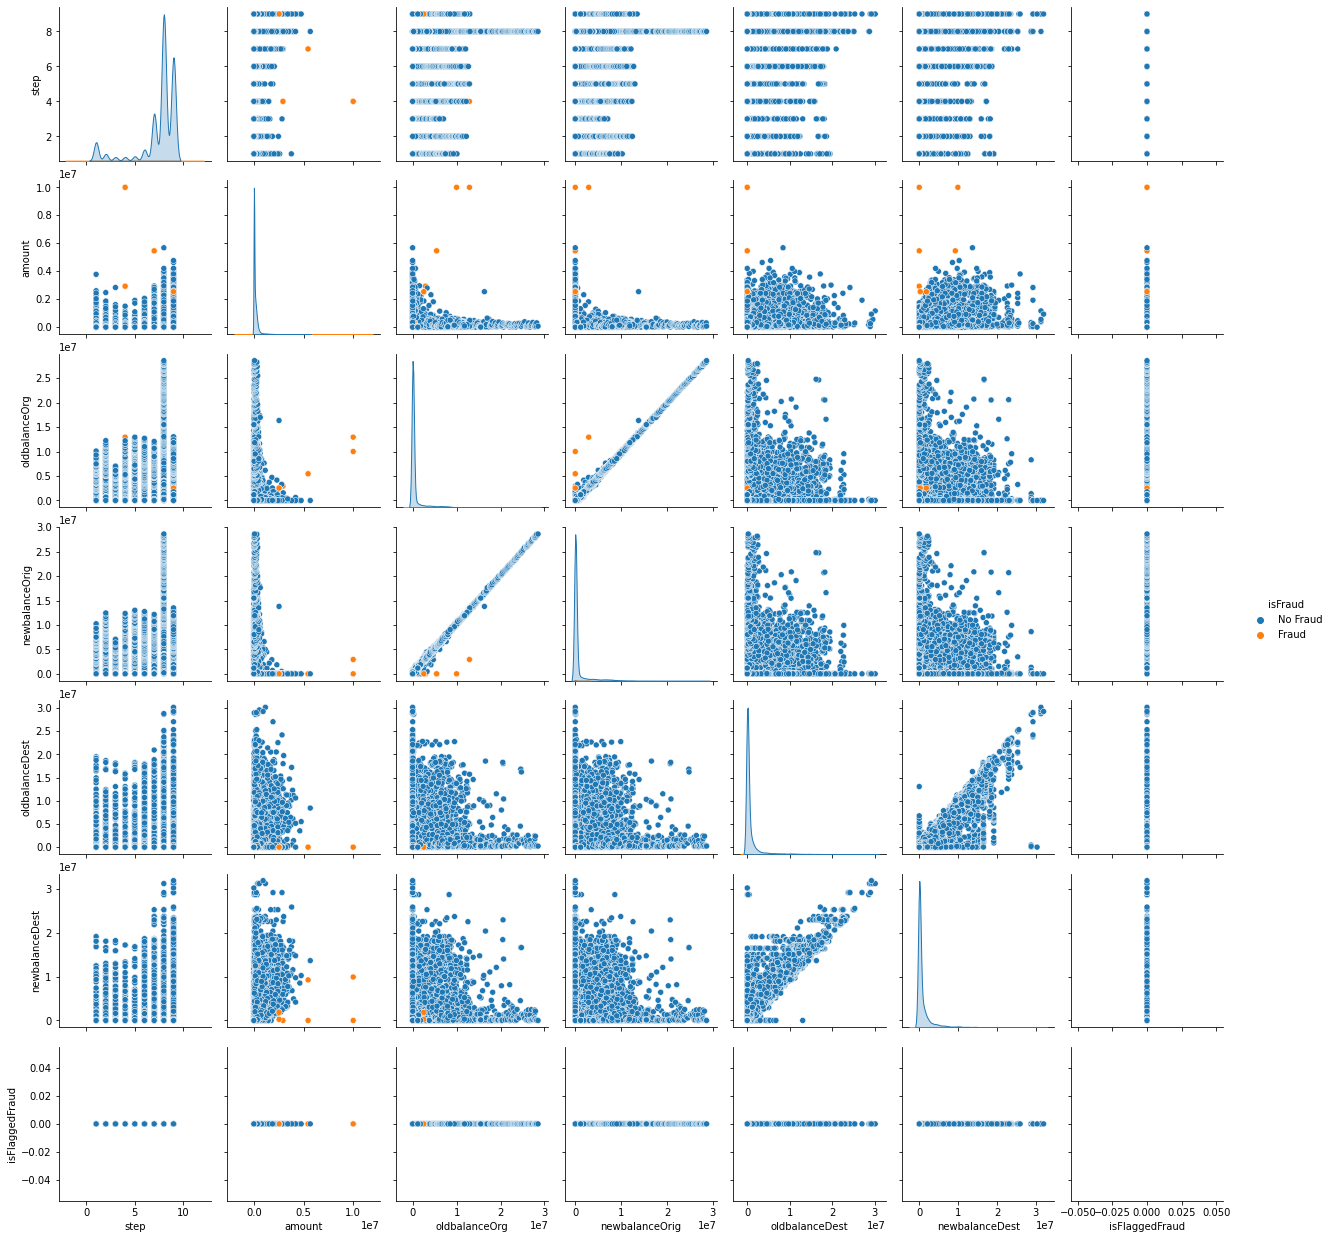

In [32]:
sns.pairplot(df.iloc[0:50000], hue= 'isFraud')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PAYMENT'),
  Text(1, 0, 'TRANSFER'),
  Text(2, 0, 'CASH_OUT'),
  Text(3, 0, 'DEBIT'),
  Text(4, 0, 'CASH_IN')])

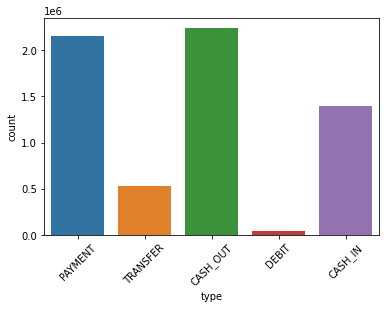

In [33]:
g= sns.countplot(x='type', data=df)
plt.xticks(rotation=45)

In [34]:
df

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
0             160296.36  M1979787155            0.00            0.00   
1              19384.72  M2044282225            0.00            0.00   
2                  0.00   C553264065            0.00            0.00   
3                  0.00    C38997010        21182.00            0.00   
4              29885.86  M1230701703            0.00            0.00   
...                 ...          ...             ...             ...   
6362615            0.00   C776919290            0.00       339682.13   
6362616            0.00  C1881841831            0.00            0.00   
6362617            0.00  C1365125890        68488.84      6379898.11   
6362618            0.00  C2080388513            0.00            0.00   
6362619            0.00   C873221189      6510099.11      7360101.63   

          isFraud  isFlaggedFraud  
0        No Fraud               0  
1        No Fraud               0  
2           Fraud               0  
3           Fraud               0  
4        No Fraud               0  
...           ...             ...  
6362615     Fraud               0  
6362616     Fraud               0  
6362617     Fraud               0  
6362618     Fraud               0  
6362619     Fraud               0  

[6362620 rows x 11 columns]

In [35]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud            object
isFlaggedFraud      int64
dtype: object

In [36]:
type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [37]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [38]:
df

step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     2     9839.64  C1231006815      170136.00       160296.36   
1           1     2     1864.28  C1666544295       21249.00        19384.72   
2           1     4      181.00  C1305486145         181.00            0.00   
3           1     1      181.00   C840083671         181.00            0.00   
4           1     2    11668.14  C2048537720       41554.00        29885.86   
...       ...   ...         ...          ...            ...             ...   
6362615   743     1   339682.13   C786484425      339682.13            0.00   
6362616   743     4  6311409.28  C1529008245     6311409.28            0.00   
6362617   743     1  6311409.28  C1162922333     6311409.28            0.00   
6362618   743     4   850002.52  C1685995037      850002.52            0.00   
6362619   743     1   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0        M1979787155            0.00            0.00  No Fraud               0  
1        M2044282225            0.00            0.00  No Fraud               0  
2         C553264065            0.00            0.00     Fraud               0  
3          C38997010        21182.00            0.00     Fraud               0  
4        M1230701703            0.00            0.00  No Fraud               0  
...              ...             ...             ...       ...             ...  
6362615   C776919290            0.00       339682.13     Fraud               0  
6362616  C1881841831            0.00            0.00     Fraud               0  
6362617  C1365125890        68488.84      6379898.11     Fraud               0  
6362618  C2080388513            0.00            0.00     Fraud               0  
6362619   C873221189      6510099.11      7360101.63     Fraud               0  

[6362620 rows x 11 columns]

### selecting variable
in this model we will tell about fraud or not fraud.For that we will select x_train set as given below and y_train is isfraud column because it will tell us about fraud 

In [39]:
x=df[["type","amount","oldbalanceOrg","newbalanceOrig"]]
y=df[["isFraud"]]

# model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# checking for other classification model

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [51]:
clfs={
    "KN":knc,
    "DT":dtc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
}

In [52]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

#### accuracy score

In [53]:
accuracy_scores=[]
for name,clf in clfs.items():
    current_accuracy=train_classifier(clf,x_train,y_train,x_test,y_test)
    print("For",name)
    print("Accuracy -",current_accuracy)
    accuracy_scores.append(current_accuracy)

C:\Users\divya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



For KN
Accuracy - 0.9996243685777243
For DT
Accuracy - 0.999115144390204


C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2876001952.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



For RF
Accuracy - 0.9997343861491021


C:\Users\divya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For AdaBoost
Accuracy - 0.9988841074903106


C:\Users\divya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For BgC
Accuracy - 0.9997556038235821


C:\Users\divya\AppData\Local\Temp\ipykernel_25916\2876001952.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



For ETC
Accuracy - 0.9997579613429688


C:\Users\divya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For GBDT
Accuracy - 0.9987450138464972


In [54]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores})

In [55]:
performance_df

Algorithm  Accuracy
0        KN  0.999624
1        DT  0.999115
2        RF  0.999734
3  AdaBoost  0.998884
4       BgC  0.999756
5       ETC  0.999758
6      GBDT  0.998745

In [56]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")


#### graph for accuracy

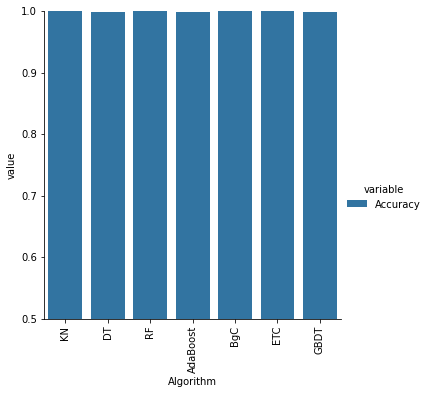

In [57]:
sns.catplot(x="Algorithm",y="value",hue="variable",data=performance_df1,kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

as we can see accuracy is almost same.SO as above DecisionTreeClassifier() is perfect for it 

In [58]:
model=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
model.score(x_test,y_test)

0.9997068817562577

In [61]:
model.predict([[2,1864,21249,19384]])

C:\Users\divya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['No Fraud'], dtype=object)

2,1864,21249,19384--This data is a index 2 of our database and it produce correct results

~Machine learning is currently the most promising innovative tool that can help companies prevent fraudulent operations that lead to greater losses each year. Yet apart from implementing modern fraud detection solutions, companies also need modern techniques.
Large corporations like Airbnb, Yelp, and Jet.com are already using AI solutions to get insights from big data and prevent issues such as fake accounts, account takeover, payment fraud, and promotion abuse. Machine learning takes care of all the dirty work of data analysis and predictive analytics and allows companies to grow and develop safe from fraud.



("type","amount","oldbalanceOrg","newbalanceOrig","isFraud")are key factor that predict fraudulent customer

What kind of prevention should be adopted while company update its infrastructure? 
1-Identify and monitor potential fraud patterns
2-Implement real-time monitoring
3-Enhance security measures

# THANKS 
